In [1]:
import csv
import wave
import math
from pydub import AudioSegment
from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import pandas as pd
import numpy as np
import os as os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pylab as pl
import seaborn as sns
import itertools
import pylab as plt
from sklearn.model_selection import GridSearchCV

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, datasets

#svm
from sklearn import svm
from sklearn.svm import SVC

#neural network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

C:\Users\guyza\Anaconda3\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
C:\Users\guyza\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# confusion matrix function

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# SVM on all the features- 25 mSec frames with 10 mSec overlap

In [3]:
data = pd.read_csv('AllFeatures.csv', header=0)
data = data.dropna()

In [4]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36']]
y = data['37']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
clf = svm.SVC()
clf.fit(X_train,y_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.95      0.73      0.83      3628
        2.0       0.94      0.93      0.94      7315
        3.0       0.99      0.91      0.95      8081
        4.0       0.98      0.75      0.85      3528
        5.0       0.75      0.99      0.85      7678

avg / total       0.91      0.89      0.89     30230



Normalized confusion matrix
[[0.72767365 0.0446527  0.00744212 0.00303197 0.21719956]
 [0.00519481 0.93369788 0.00451128 0.00218729 0.05440875]
 [0.00668234 0.01497339 0.9095409  0.00222745 0.06657592]
 [0.00680272 0.0260771  0.00368481 0.74744898 0.21598639]
 [0.00208388 0.00716332 0.0024746  0.00156291 0.98671529]]


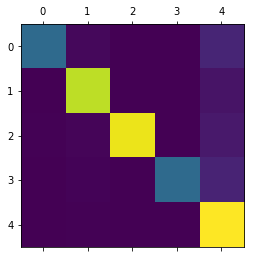

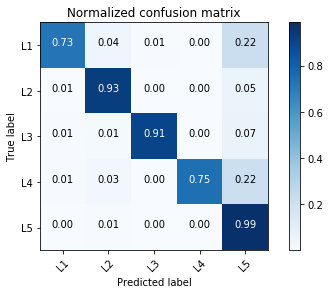

In [8]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# SVM on all the features- 15 mSec frames with 5 mSec overlap

In [8]:
data = pd.read_csv('AllFeatures15mSec5mSec.csv', header=0)
data = data.dropna()

In [9]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36']]
y = data['37']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
clf = svm.SVC()
clf.fit(X_train,y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.99      0.55      0.70      3621
        2.0       0.50      0.62      0.55     26551
        3.0       0.21      0.16      0.18      7984
        4.0       0.06      0.03      0.04      1442
        5.0       0.12      0.08      0.09      7732

avg / total       0.41      0.43      0.41     47330



Normalized confusion matrix
[[5.46810273e-01 4.52361226e-01 8.28500414e-04 0.00000000e+00
  0.00000000e+00]
 [7.53267297e-04 6.23629995e-01 1.87676547e-01 2.28239991e-02
  1.65116191e-01]
 [1.00200401e-03 8.37049098e-01 1.61948898e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.72260749e-01 0.00000000e+00 2.77392510e-02
  0.00000000e+00]
 [1.29332644e-04 9.24469736e-01 0.00000000e+00 0.00000000e+00
  7.54009312e-02]]


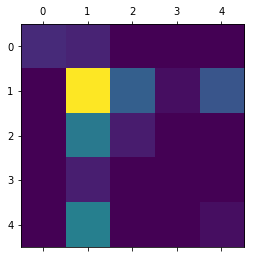

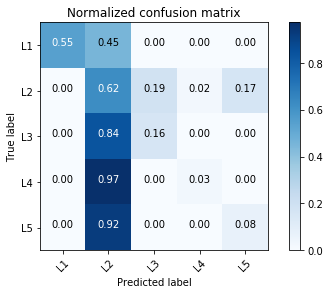

In [12]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# SVM on all the features- 50 mSec frames with 20 mSec overlap

In [13]:
data = pd.read_csv('AllFeatures50mSec20mSec.csv', header=0)
data = data.dropna()

In [14]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36']]
y = data['37']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf = svm.SVC()
clf.fit(X_train,y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.99      0.46      0.63      3621
        2.0       0.48      0.61      0.54     26551
        3.0       0.17      0.14      0.15      7984
        4.0       0.04      0.02      0.02      1442
        5.0       0.09      0.06      0.07      7732

avg / total       0.39      0.41      0.39     47330



Normalized confusion matrix
[[4.60370064e-01 5.38801436e-01 8.28500414e-04 0.00000000e+00
  0.00000000e+00]
 [6.77940567e-04 6.13762194e-01 1.93853339e-01 2.31629694e-02
  1.68543558e-01]
 [5.01002004e-04 8.62725451e-01 1.36773547e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 9.81969487e-01 0.00000000e+00 1.80305132e-02
  0.00000000e+00]
 [0.00000000e+00 9.41541645e-01 0.00000000e+00 0.00000000e+00
  5.84583549e-02]]


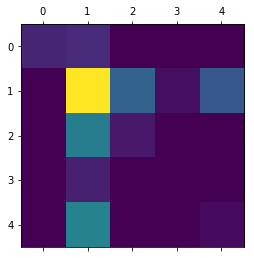

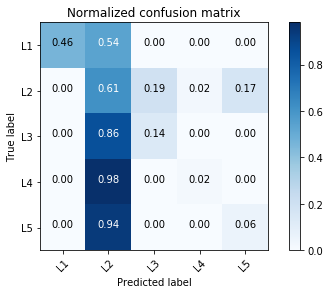

In [17]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# SVM delta features

In [9]:
data = pd.read_csv('newdelta.csv', header=0)
data = data.dropna()

In [10]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12']]
y = data['13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
clf = svm.SVC()
clf.fit(X_train,y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.60      0.08      0.15      3628
        2.0       0.36      0.43      0.39      7315
        3.0       0.47      0.52      0.49      8081
        4.0       0.82      0.06      0.11      3528
        5.0       0.38      0.57      0.46      7678

avg / total       0.48      0.41      0.37     30230



Normalized confusion matrix
[[0.72767365 0.0446527  0.00744212 0.00303197 0.21719956]
 [0.00519481 0.93369788 0.00451128 0.00218729 0.05440875]
 [0.00668234 0.01497339 0.9095409  0.00222745 0.06657592]
 [0.00680272 0.0260771  0.00368481 0.74744898 0.21598639]
 [0.00208388 0.00716332 0.0024746  0.00156291 0.98671529]]


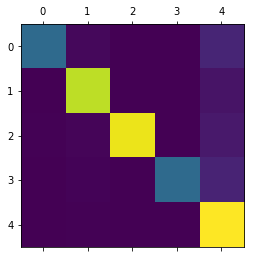

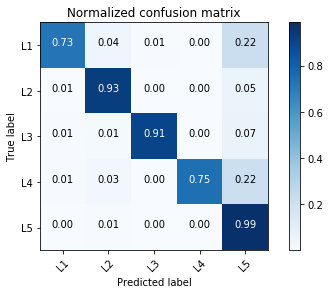

In [12]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# SVM on delta-delta

In [13]:
data = pd.read_csv('newdeltadelta.csv', header=0)
data = data.dropna()

In [14]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11']]
y = data['12']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.38      0.03      0.05      3628
        2.0       0.36      0.13      0.19      7315
        3.0       0.33      0.84      0.48      8081
        4.0       0.83      0.00      0.01      3528
        5.0       0.36      0.33      0.34      7678

avg / total       0.41      0.34      0.27     30230



Normalized confusion matrix
[[2.94928335e-02 1.35887541e-01 5.44652701e-01 0.00000000e+00
  2.89966924e-01]
 [5.19480519e-03 1.28639781e-01 6.63021189e-01 0.00000000e+00
  2.03144224e-01]
 [6.31110011e-03 3.89803242e-02 8.44326197e-01 1.23747061e-04
  1.10258631e-01]
 [9.92063492e-03 8.30498866e-02 6.25000000e-01 2.83446712e-03
  2.79195011e-01]
 [6.12138578e-03 7.37171138e-02 5.92732482e-01 1.30242251e-04
  3.27298776e-01]]


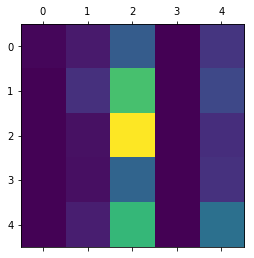

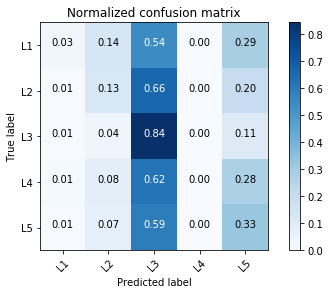

In [17]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# Logistic Regression on all the features

In [18]:
data = pd.read_csv('AllFeatures.csv', header=0)
data = data.dropna()

In [19]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36']]
y = data['37']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.37      0.11      0.17      3628
        2.0       0.47      0.62      0.54      7315
        3.0       0.63      0.65      0.64      8081
        4.0       0.43      0.09      0.15      3528
        5.0       0.49      0.66      0.56      7678

avg / total       0.50      0.52      0.48     30230



Normalized confusion matrix
[[0.11356119 0.38809261 0.16289967 0.02425579 0.31119074]
 [0.0254272  0.62173616 0.14736842 0.01421736 0.19125085]
 [0.02474941 0.16520233 0.64744462 0.00519738 0.15740626]
 [0.0345805  0.3015873  0.12585034 0.08730159 0.45068027]
 [0.025267   0.17100808 0.11825996 0.0218807  0.66358427]]


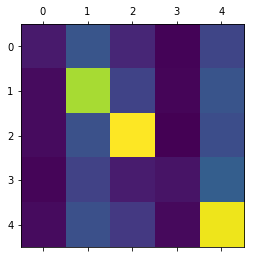

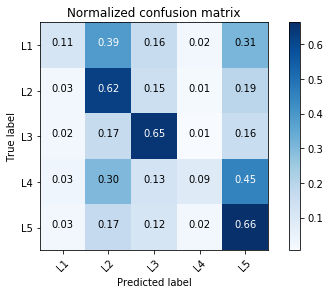

In [22]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# Logistic Regression delta features

In [45]:
data = pd.read_csv('newdelta.csv', header=0)
data = data.dropna()

In [46]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12']]
y= data['13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00      3628
        2.0       0.23      0.00      0.01      7315
        3.0       0.27      0.81      0.40      8081
        4.0       0.00      0.00      0.00      3528
        5.0       0.23      0.17      0.19      7678

avg / total       0.19      0.26      0.16     30230



C:\Users\guyza\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Normalized confusion matrix
[[0.         0.00661521 0.78886439 0.         0.2045204 ]
 [0.         0.00492139 0.8101162  0.         0.18496241]
 [0.         0.00383616 0.81128573 0.         0.18487811]
 [0.         0.00651927 0.80442177 0.         0.18905896]
 [0.         0.0058609  0.82716853 0.         0.16697057]]


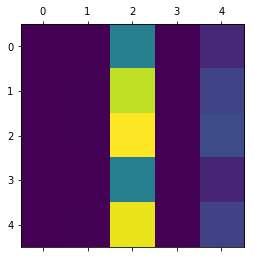

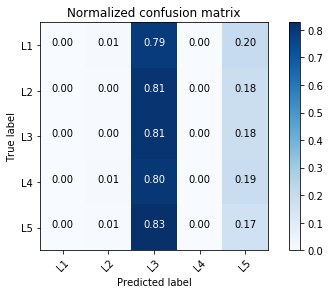

In [49]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# Logistic Regression delta-delta features

In [50]:
data = pd.read_csv('newdeltadelta.csv', header=0)
data = data.dropna()

In [51]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11']]
y = data['12']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00      3628
        2.0       0.20      0.00      0.00      7315
        3.0       0.27      0.84      0.41      8081
        4.0       0.00      0.00      0.00      3528
        5.0       0.26      0.19      0.22      7678

avg / total       0.19      0.27      0.17     30230



C:\Users\guyza\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Normalized confusion matrix
[[0.         0.00578831 0.78610805 0.         0.20810364]
 [0.         0.0024607  0.82228298 0.         0.17525632]
 [0.         0.00173246 0.83702512 0.         0.16124242]
 [0.         0.00481859 0.78401361 0.         0.2111678 ]
 [0.         0.00234436 0.81245116 0.         0.18520448]]


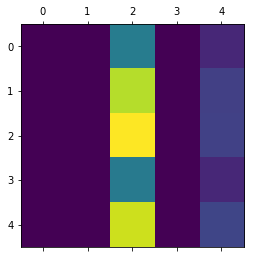

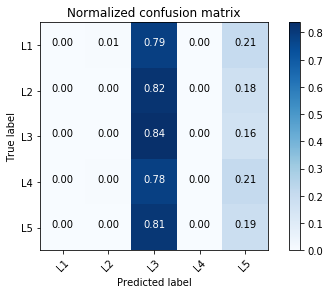

In [54]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# NN with all features

In [55]:
data = pd.read_csv('AllFeatures.csv', header=0)
data = data.dropna()

In [56]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36']]
y = data['37']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.52      0.35      0.41      3628
        2.0       0.61      0.78      0.69      7315
        3.0       0.85      0.76      0.80      8081
        4.0       0.65      0.43      0.52      3528
        5.0       0.66      0.75      0.70      7678

avg / total       0.68      0.68      0.67     30230



Normalized confusion matrix
[[0.34647189 0.33958104 0.07717751 0.05871003 0.17805954]
 [0.04730007 0.78072454 0.04743677 0.0228298  0.10170882]
 [0.02809058 0.10431877 0.76463309 0.01769583 0.08526173]
 [0.08928571 0.1680839  0.04875283 0.42857143 0.26530612]
 [0.03803074 0.1251628  0.04297994 0.04011461 0.7537119 ]]


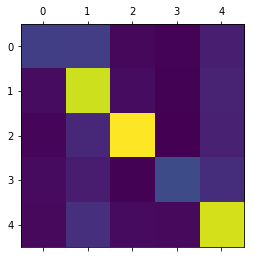

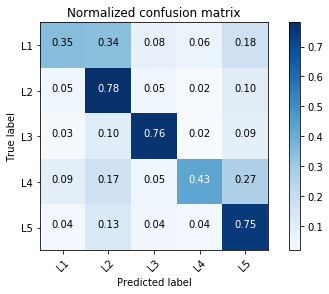

In [59]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# NN with delta feature

In [60]:
data = pd.read_csv('newdelta.csv', header=0)
data = data.dropna()

In [61]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11','12']]
y = data['13']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [63]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.25      0.03      0.06      3628
        2.0       0.31      0.44      0.37      7315
        3.0       0.46      0.59      0.51      8081
        4.0       0.32      0.00      0.00      3528
        5.0       0.36      0.42      0.39      7678

avg / total       0.36      0.38      0.33     30230



Normalized confusion matrix
[[3.14222712e-02 3.92227122e-01 2.62127894e-01 8.26901874e-04
  3.13395810e-01]
 [1.42173616e-02 4.40738209e-01 2.65618592e-01 4.10116200e-04
  2.79015721e-01]
 [8.78604133e-03 2.33139463e-01 5.88541022e-01 4.94988244e-04
  1.69038485e-01]
 [2.09750567e-02 3.51757370e-01 2.96768707e-01 2.26757370e-03
  3.28231293e-01]
 [1.30242251e-02 3.34592342e-01 2.27923939e-01 9.11695754e-04
  4.23547799e-01]]


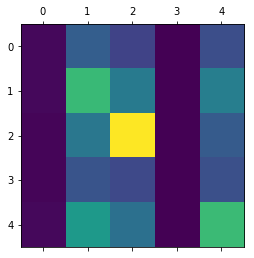

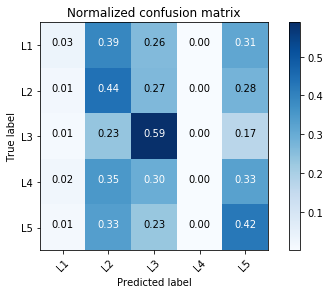

In [64]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# NN with delta-delta feature

In [65]:
data = pd.read_csv('newdeltadelta.csv', header=0)
data = data.dropna()

In [66]:
X= data[['1', '2', '3','4','5', '6','7','8','10','11']]
y = data['12']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

In [68]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        1.0       0.29      0.03      0.06      3628
        2.0       0.32      0.36      0.34      7315
        3.0       0.45      0.59      0.51      8081
        4.0       0.33      0.00      0.01      3528
        5.0       0.34      0.48      0.40      7678

avg / total       0.36      0.37      0.33     30230



Normalized confusion matrix
[[3.14222712e-02 2.93274531e-01 2.61300992e-01 2.48070562e-03
  4.11521499e-01]
 [1.05263158e-02 3.64593301e-01 2.57142857e-01 1.23034860e-03
  3.66507177e-01]
 [7.17732954e-03 1.86734315e-01 5.91634699e-01 3.71241183e-04
  2.14082416e-01]
 [1.38888889e-02 2.94501134e-01 2.96485261e-01 3.96825397e-03
  3.91156463e-01]
 [1.22427716e-02 2.62959104e-01 2.43683251e-01 9.11695754e-04
  4.80203178e-01]]


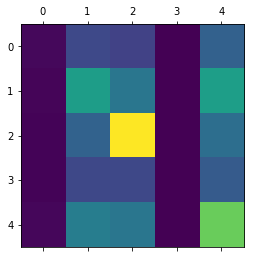

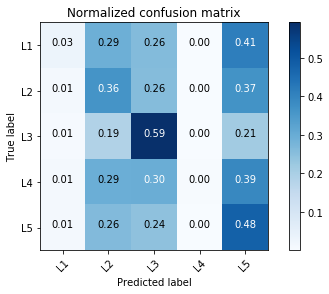

In [69]:
cm = confusion_matrix(y_test, predictions)
pl.matshow(cm)
class_names=['L1','L2','L3','L4','L5']
plt.figure()
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()